<a href="https://colab.research.google.com/github/athens-21/DE242/blob/main/242_2_2024_Image_Yoga_Pose_8_April_2025_0252.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("niharika41298/yoga-poses-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1


In [5]:
import cv2
import numpy as np
from tqdm import tqdm
import skimage
import os

In [6]:
train_folder_path = path + "/DATASET/TRAIN"
img_size = 224
X = []
Y = []

for idx, yoga_pose in enumerate(os.listdir(train_folder_path)):
    i = 0
    for img_name in tqdm(os.listdir(os.path.join(train_folder_path, yoga_pose))):
        if i < 300:
            img_path = os.path.join(train_folder_path, yoga_pose, img_name)
            img_file = cv2.imread(img_path)
            if img_file is not None:
                img_file = skimage.transform.resize(img_file, (img_size, img_size, 3))
                X.append(img_file)
                Y.append(idx)
                i += 1
        else:
            break

X = np.asarray(X)
Y = np.asarray(Y)

# Save the arrays
with open('X_train.npy', 'wb') as f:
    np.save(f, X)
with open('Y_train.npy', 'wb') as f:
    np.save(f, Y)

100%|██████████| 266/266 [00:52<00:00,  5.05it/s]


In [7]:
test_folder_path = path + "/DATASET/TEST"
img_size = 224
X = []
Y = []

for idx, yoga_pose in enumerate(os.listdir(test_folder_path)):
    i = 0
    for img_name in tqdm(os.listdir(os.path.join(test_folder_path, yoga_pose))):
        if i < 300:
            img_path = os.path.join(test_folder_path, yoga_pose, img_name)
            img_file = cv2.imread(img_path)
            if img_file is not None:
                img_file = skimage.transform.resize(img_file, (img_size, img_size, 3))
                X.append(img_file)
                Y.append(idx)
                i += 1
        else:
            break

X = np.asarray(X)
Y = np.asarray(Y)

# Save the arrays
with open('X_test.npy', 'wb') as f:
    np.save(f, X)
with open('Y_test.npy', 'wb') as f:
    np.save(f, Y)

100%|██████████| 115/115 [01:00<00:00,  1.90it/s]


**Yoga pose classification using CNN**

In [8]:
!pip3 install keras
!pip3 install tensorflow

In [9]:
# อ้างอิงจาก: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # เพื่อให้สามารถโหลดภาพที่อาจเสียบางส่วนได้

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = path + "/DATASET/TRAIN"
print("Train path:", train_path)

# สร้าง ImageDataGenerator พร้อมใช้ preprocessing ของ VGG16 และแบ่ง validation set 20%
image_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2
)

# สร้างชุดข้อมูลสำหรับ training
train_dataset = image_generator.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=True,
    subset="training",
    classes=['warrior2', 'downdog', 'tree', 'plank', 'goddess']
)

# สร้างชุดข้อมูลสำหรับ validation
validation_dataset = image_generator.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=True,
    subset="validation",
    classes=['warrior2', 'downdog', 'tree', 'plank', 'goddess']
)


Train path: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN
Found 866 images belonging to 5 classes.
Found 215 images belonging to 5 classes.


In [11]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(units=5, activation='softmax')  # 5 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
# fit model
model.fit(x=train_dataset, validation_data=validation_dataset, epochs=2, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


87/87 - 94s - 1s/step - accuracy: 0.3268 - loss: 54.1348 - val_accuracy: 0.4372 - val_loss: 9.2022
Epoch 2/2
87/87 - 80s - 915ms/step - accuracy: 0.7552 - loss: 2.8450 - val_accuracy: 0.5628 - val_loss: 5.6569


In [14]:
# get probability predictions
prob_pred = model.predict(x=validation_dataset, steps=len(validation_dataset), verbose=0)
print(prob_pred)

[[5.7206057e-13 1.2546553e-17 1.7908340e-08 9.9998659e-01 1.3366369e-05]
 [9.9999994e-01 2.3570482e-08 8.3055475e-31 6.6907977e-09 2.6445765e-08]
 [9.7713917e-01 5.5583272e-13 2.2674123e-02 2.6285516e-15 1.8672277e-04]
 ...
 [2.6314201e-06 9.9999738e-01 2.2928772e-17 5.4381651e-13 6.8281582e-17]
 [6.4817739e-01 6.9104537e-16 3.5055766e-01 2.1880448e-06 1.2628188e-03]
 [8.1761050e-01 2.9991461e-17 3.6666719e-05 3.1800106e-22 1.8235286e-01]]


In [15]:
# predict crisp classes for test set
y_pred = np.argmax(prob_pred, axis=1)
print(y_pred)

[3 0 0 3 1 4 4 0 4 3 1 2 1 3 1 0 0 0 4 1 2 3 1 0 0 2 0 2 3 1 0 4 1 1 0 1 4
 3 0 0 1 0 3 0 0 1 2 2 3 1 0 2 3 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 0 0
 1 0 0 0 0 0 1 0 2 0 0 4 0 0 4 0 1 2 0 0 0 4 2 3 0 3 3 3 3 0 1 0 3 2 1 0 0
 0 3 2 0 3 0 0 1 0 4 1 2 0 1 2 2 0 0 0 0 3 0 0 0 2 0 0 0 0 0 0 0 0 1 3 4 0
 0 3 4 0 4 0 0 1 1 4 1 2 0 0 0 2 2 0 2 2 0 0 3 1 0 4 0 0 1 0 1 0 3 0 0 0 0
 4 3 3 0 3 1 4 1 3 0 4 3 0 3 0 0 0 4 0 0 4 0 3 1 1 2 0 1 0 0]


In [16]:
len(y_pred)

215

In [17]:
validation_dataset.class_indices

{'warrior2': 0, 'downdog': 1, 'tree': 2, 'plank': 3, 'goddess': 4}

In [18]:
y_val = validation_dataset.classes
print(y_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [20]:
validation_dataset.class_indices

{'warrior2': 0, 'downdog': 1, 'tree': 2, 'plank': 3, 'goddess': 4}

In [21]:
y_val = validation_dataset.classes
print(y_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [22]:
confusion_matrix(y_val, y_pred)

array([[16, 13,  6,  9,  6],
       [31,  5,  4,  2,  2],
       [12,  5,  5,  8,  2],
       [30,  7,  7,  4,  5],
       [17,  5,  1,  8,  5]])

In [23]:
accuracy = accuracy_score(y_val, y_pred)
weighted_precision = precision_score(y_val, y_pred, average='weighted')
weighted_recall = recall_score(y_val, y_pred, average='weighted')
weighted_f1_score = f1_score(y_val, y_pred, average='weighted')
print("Accuracy = {}".format(accuracy))
print("Weighted precision = {}".format(weighted_precision))
print("Weighted recall = {}".format(weighted_recall))
print("Weighted f1-score = {}".format(weighted_f1_score))

Accuracy = 0.16279069767441862
Weighted precision = 0.17036332797016202
Weighted recall = 0.16279069767441862
Weighted f1-score = 0.1540483851346377


In [24]:
test_path = path + "/DATASET/TEST"
print("Test path:", test_path)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image preprocessing using VGG16's preprocessing
image_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Load test dataset
test_dataset = image_generator.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=10,
    shuffle=True,  # ถ้าไม่อยากให้สับลำดับขณะประเมิน อาจใช้ shuffle=False ก็ได้
    classes=['warrior2', 'downdog', 'tree', 'plank', 'goddess']
)


Test path: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TEST
Found 470 images belonging to 5 classes.


In [25]:
y_test = test_dataset.classes
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [26]:
# get probability predictions
prob_pred = model.predict(x=test_dataset, steps=len(test_dataset), verbose=0)
print(prob_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


[[9.9999994e-01 1.6509111e-30 9.0925079e-30 1.4187193e-22 1.1913697e-12]
 [1.6441476e-01 3.7246489e-13 7.8891260e-10 6.4819391e-12 8.3558518e-01]
 [9.8509139e-01 1.4893285e-02 1.5158270e-05 2.0584147e-16 1.7338135e-07]
 ...
 [9.9999982e-01 2.2915775e-19 1.3009803e-16 1.9693867e-16 1.0910860e-07]
 [4.8883669e-02 3.1472986e-14 2.0080186e-10 7.2278880e-13 9.5111632e-01]
 [1.0000000e+00 3.0971363e-30 5.6667678e-23 8.0657946e-28 7.1211624e-13]]


In [27]:
y_pred = np.argmax(prob_pred,axis=1)
print(y_pred)

[0 4 0 3 0 3 1 2 2 0 2 3 1 2 4 1 0 1 1 2 4 0 0 0 2 3 4 3 0 0 4 3 1 4 3 3 1
 3 0 3 4 0 4 4 1 1 4 3 0 1 0 0 3 4 1 2 1 4 3 1 0 1 4 1 3 1 1 0 0 0 4 3 0 4
 0 2 1 4 0 0 1 0 0 1 0 0 3 0 2 1 0 2 4 0 1 1 1 3 2 4 0 2 3 2 0 0 2 1 3 2 0
 0 0 0 0 2 0 2 4 0 4 4 0 0 1 4 0 0 0 0 0 3 1 0 0 0 0 4 1 2 3 0 0 2 2 0 4 2
 1 2 4 4 0 0 0 4 0 1 0 0 0 1 0 0 4 3 4 0 4 0 3 3 0 1 0 3 0 0 0 0 2 0 0 0 3
 0 0 2 0 1 2 1 1 3 3 2 4 0 0 0 2 3 0 2 4 4 0 0 4 1 1 4 1 0 4 0 1 1 4 0 4 0
 0 1 2 4 3 4 1 0 0 3 4 0 3 4 0 0 0 0 3 2 0 3 0 2 3 0 4 0 0 0 4 3 4 0 4 2 3
 0 0 0 3 3 1 4 0 3 0 0 4 2 0 1 0 0 4 0 4 1 3 0 0 0 4 3 2 1 1 3 3 4 1 0 4 0
 4 4 4 0 0 2 4 0 0 0 3 0 0 0 0 2 0 2 2 1 0 0 2 0 3 3 2 2 3 0 1 0 1 0 4 4 1
 0 0 1 2 1 3 2 0 2 0 0 4 3 0 1 0 4 1 1 3 0 0 1 1 0 0 1 3 4 0 3 3 0 0 1 0 2
 1 1 0 3 0 0 4 2 1 4 0 4 3 4 3 2 0 0 3 0 0 0 0 0 4 1 4 4 1 0 4 1 3 2 4 1 2
 0 3 0 2 3 0 3 3 3 1 3 0 0 4 4 1 0 0 2 2 3 3 0 3 2 0 3 3 0 0 2 0 0 1 0 0 1
 0 0 0 3 3 4 0 0 3 0 0 3 3 0 3 0 0 1 0 4 2 4 0 0 4 0]


In [28]:
confusion_matrix(y_test, y_pred)

array([[33, 25, 14, 19, 18],
       [48, 10, 14, 10, 15],
       [29,  9,  5, 11, 15],
       [45, 20, 14, 18, 18],
       [34,  9,  8, 18, 11]])

In [29]:
accuracy = accuracy_score(y_test, y_pred)
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Accuracy = {}".format(accuracy))
print("Weighted precision = {}".format(weighted_precision))
print("Weighted recall = {}".format(weighted_recall))
print("Weighted f1-score = {}".format(weighted_f1_score))

Accuracy = 0.16382978723404254
Weighted precision = 0.16437778313018
Weighted recall = 0.16382978723404254
Weighted f1-score = 0.15745277486210568


# **Transfer learnling**

In [30]:
import glob
#For Google Colab
train_path = path+"/DATASET/TRAIN/*"
paths=glob.glob(train_path)
#For local JupyterNotebook
#paths=glob.glob("path-to-dataset\yoga_pose_dataset\DATASET\TRAIN\*")
print("There are {} output classes".format(len(paths)))

There are 5 output classes


In [31]:
print('{0} \n {1} \n {2} \n {3} \n {4}'.format(paths[0], paths[1], paths[2], paths[3], paths[4]))

/root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/warrior2 
 /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/tree 
 /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/downdog 
 /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/goddess 
 /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/plank


In [32]:
!pip3 install tqdm

In [33]:
def preprocessing(path, output):
    X = []
    Y = []

    # โหลดไฟล์ทั้งหมดที่มีนามสกุล .jpg จาก path ที่กำหนด
    path_of_data = glob.glob(path + '/*.jpg')
    print(f"Found {len(path_of_data)} images in: {path}")

    for i in tqdm(path_of_data):
        # โหลดรูปและปรับขนาดเป็น 224x224 (เหมาะกับ MobileNet)
        image = tf.keras.preprocessing.image.load_img(i, target_size=(224, 224))

        # แปลงเป็นอาเรย์และ normalize (0-1)
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = image / 255.0

        X.append(image)
        Y.append(output)  # ใส่ label ที่กำหนดไว้ล่วงหน้า

    return np.array(X), np.array(Y)

In [34]:
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
label=[0,1,2,3,4]
X_goddess, Y_goddess = preprocessing(paths[0],label[0])
X_downdog,Y_downdog = preprocessing(paths[1],label[1])
X_warrior2,Y_warrior2 = preprocessing(paths[2],label[2])
X_tree,Y_tree = preprocessing(paths[3],label[3])
X_plank,Y_plank = preprocessing(paths[4],label[4])

Found 240 images in: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/warrior2


100%|██████████| 240/240 [00:02<00:00, 88.98it/s]


Found 149 images in: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/tree


100%|██████████| 149/149 [00:03<00:00, 40.00it/s]


Found 197 images in: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/downdog


100%|██████████| 197/197 [00:02<00:00, 77.52it/s]


Found 165 images in: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/goddess


100%|██████████| 165/165 [00:04<00:00, 35.49it/s]


Found 239 images in: /root/.cache/kagglehub/datasets/niharika41298/yoga-poses-dataset/versions/1/DATASET/TRAIN/plank


100%|██████████| 239/239 [00:03<00:00, 60.71it/s]


In [35]:
X=np.concatenate((X_goddess,X_downdog,X_warrior2,X_tree,X_plank),axis=0)
Y=np.concatenate((Y_goddess,Y_downdog,Y_warrior2,Y_tree,Y_plank),axis=0)

In [36]:
print('X shape: {}\nY shape: {}'.format(X.shape, Y.shape))

X shape: (990, 224, 224, 3)
Y shape: (990,)


In [37]:
!pip3 install tensorflow

In [38]:
from tensorflow.keras.applications import MobileNetV2
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
input_shape=(224, 224, 3),
include_top=False,
weights='imagenet',
pooling='avg'
)
#Freeze the model
pretrained_model.trainable = False

In [39]:
from keras.layers import Flatten, Dense
x = Flatten()(pretrained_model.output)
prediction = Dense(len(paths), activation='softmax')(x)

In [40]:
from keras.models import Model
model = Model(inputs=pretrained_model.input, outputs=prediction)

In [41]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [42]:
model.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [43]:
model.fit(X,Y,epochs=2,verbose=1)

Epoch 1/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.4217 - loss: 1.4915
Epoch 2/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7937 - loss: 0.7029


In [44]:
prob_pred = model.predict(x=X, verbose=0)
print(prob_pred)

[[0.6743256  0.03020577 0.07861964 0.01464476 0.20220414]
 [0.4210232  0.24724633 0.14942552 0.04558619 0.13671872]
 [0.9297318  0.01742403 0.00992703 0.01551311 0.02740407]
 ...
 [0.06320173 0.05552061 0.07773113 0.06872014 0.7348264 ]
 [0.32582963 0.13387187 0.19758661 0.07030767 0.27240428]
 [0.11243699 0.0310817  0.26451302 0.04992918 0.5420391 ]]


In [45]:
y_pred = np.argmax(prob_pred, axis=1)
print(y_pred)

[0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 4 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 1 0 2 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 4 0 0 0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 4 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 3 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 4 0 1 4 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 4 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 4 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 1 2 2 2 4 2 2 2 2 2 4 3 

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(Y, y_pred)

array([[213,   5,   4,   7,  11],
       [ 11, 129,   0,   5,   4],
       [  5,   2, 177,   2,  11],
       [ 18,  13,   3, 124,   7],
       [  8,   2,  11,   2, 216]])

In [48]:
accuracy = accuracy_score(Y, y_pred)
weighted_precision = precision_score(Y, y_pred, average='weighted')
weighted_recall = recall_score(Y, y_pred, average='weighted')
weighted_f1_score = f1_score(Y, y_pred, average='weighted')
print("Accuracy = {}".format(accuracy))
print("Weighted precision = {}".format(weighted_precision))
print("Weighted recall = {}".format(weighted_recall))
print("Weighted f1-score = {}".format(weighted_f1_score))

Accuracy = 0.8676767676767677
Weighted precision = 0.8687328504311433
Weighted recall = 0.8676767676767677
Weighted f1-score = 0.8669961825131082


In [49]:
def preprocessing(path, output):
    X = []
    Y = []

    # หาไฟล์ทั้งหมดใน path ที่ลงท้ายด้วย .jpg
    path_of_data = glob.glob(path + '/*.jpg')
    print(f"Found {len(path_of_data)} images in: {path}")

    for i in tqdm(path_of_data):
        # โหลดและปรับขนาดรูปเป็น 150x150
        image = tf.keras.preprocessing.image.load_img(i, target_size=(150, 150))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = image / 255.0  # Normalize

        X.append(image)
        Y.append(output)

    return np.array(X), np.array(Y)

In [51]:
!pip3 install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [52]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
!pip3 install mediapipe

In [54]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
mp_pose = mp.solutions.pose

In [56]:
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

In [57]:
mp_drawing = mp.solutions.drawing_utils

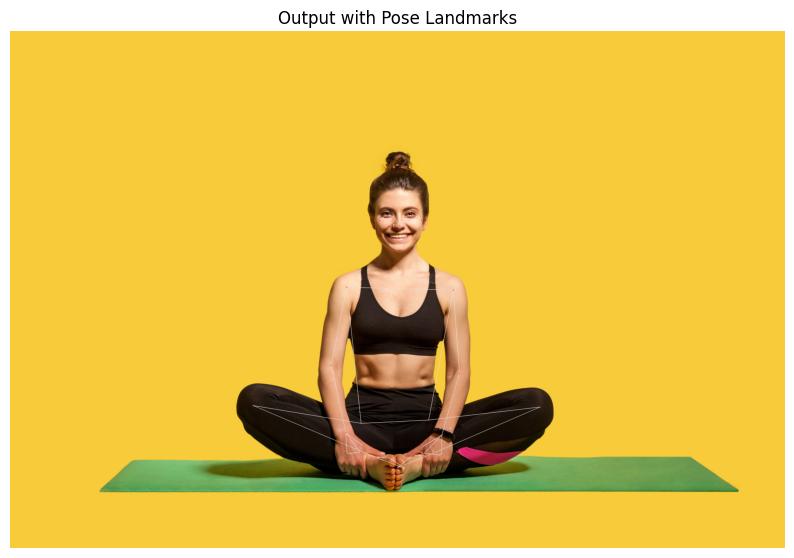

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import urllib.request

# URL ของภาพ
url = 'https://hips.hearstapps.com/hmg-prod/images/cheerful-pretty-woman-with-hair-bun-in-tight-royalty-free-image-1672861623.jpg'

# โหลดภาพจาก URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
my_yoga_pose_img = cv2.imdecode(image, cv2.IMREAD_COLOR)  # อ่านด้วย OpenCV

# Convert image from BGR to RGB
my_yoga_pose_img_rgb = cv2.cvtColor(my_yoga_pose_img, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Pose module
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize the Pose detector
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # Perform pose detection
    results = pose.process(my_yoga_pose_img_rgb)

    # Create a copy of the image to draw landmarks
    output_img = my_yoga_pose_img.copy()

    # Check if any landmarks are found and draw them
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_img,
                                  landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)

# Specify a size for the output image
plt.figure(figsize=[10, 10])
plt.title("Output with Pose Landmarks")
plt.axis('off')
plt.imshow(output_img[:,:,::-1])  # Convert BGR to RGB for display
plt.show()


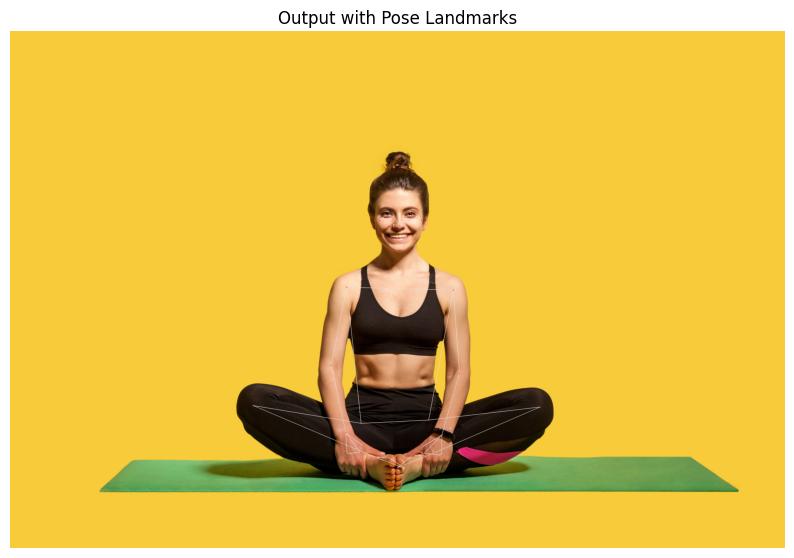

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import urllib.request

# URL of the image
url = 'https://hips.hearstapps.com/hmg-prod/images/cheerful-pretty-woman-with-hair-bun-in-tight-royalty-free-image-1672861623.jpg'

# Load image from URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)  # BGR format

# Convert BGR to RGB for processing/display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Perform pose detection
results = pose.process(img_rgb)

# Draw landmarks on a copy of the original image
output_img = img.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image=output_img,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS
    )

# Display 2D output with landmarks
plt.figure(figsize=[10, 10])
plt.title("Output with Pose Landmarks")
plt.axis('off')
plt.imshow(output_img[:, :, ::-1])  # Convert BGR to RGB for display
plt.show()

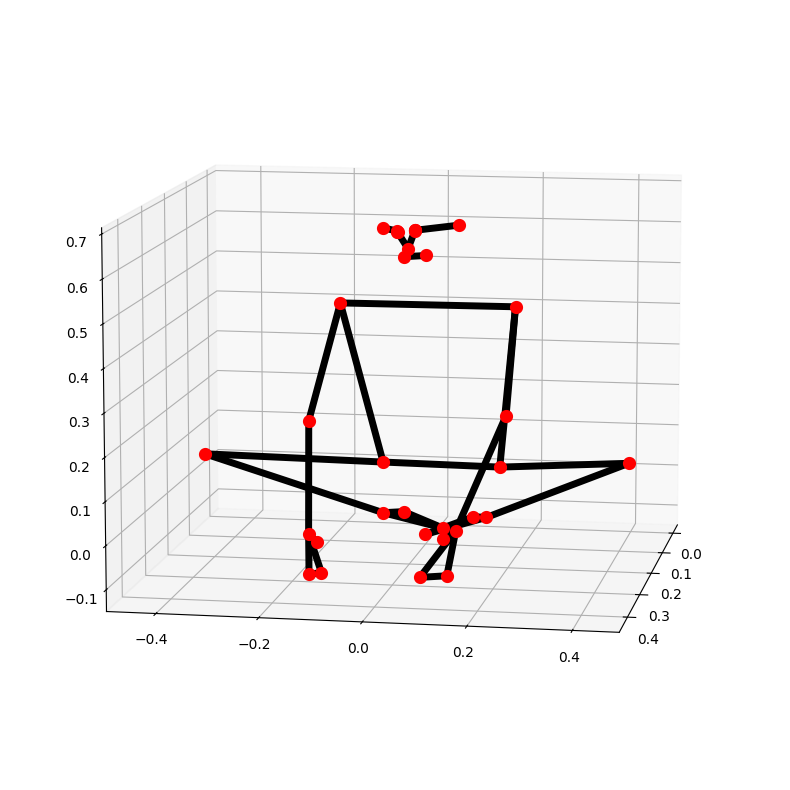

NOSE:
x: 0.503130913
y: 0.376040816
z: -0.290417671
visibility: 0.999880791

LEFT_EYE_INNER:
x: 0.513026655
y: 0.356679946
z: -0.276491702
visibility: 0.999966



In [69]:
# Plot 3D pose landmarks
if results.pose_landmarks:
    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# Print the first two normalized landmarks
if results.pose_landmarks:
    for i in range(2):
        landmark_name = mp_pose.PoseLandmark(i).name
        landmark_data = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]
        print(f'{landmark_name}:\n{landmark_data}')

# Clean up
pose.close()

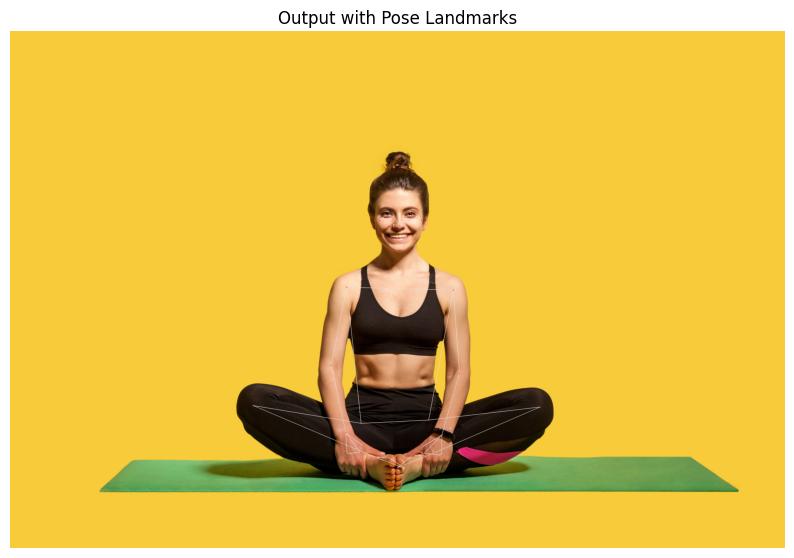

NOSE:
x: 2825.58 pixels
y: 1407.90 pixels
z: -1630.99 pixels
visibility: 0.9999

LEFT_EYE_INNER:
x: 2881.16 pixels
y: 1335.41 pixels
z: -1552.78 pixels
visibility: 1.0000



In [70]:
# Load image from URL
url = 'https://hips.hearstapps.com/hmg-prod/images/cheerful-pretty-woman-with-hair-bun-in-tight-royalty-free-image-1672861623.jpg'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)  # BGR format

# Get image dimensions
image_height, image_width, _ = img.shape

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Perform pose detection
results = pose.process(img_rgb)

# Draw landmarks on a copy of the image
output_img = img.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image=output_img,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS
    )

# Display 2D output
plt.figure(figsize=[10, 10])
plt.title("Output with Pose Landmarks")
plt.axis('off')
plt.imshow(output_img[:, :, ::-1])  # BGR to RGB
plt.show()

# Print first two landmarks in original scale
if results.pose_landmarks:
    for i in range(2):
        landmark = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {landmark.x * image_width:.2f} pixels')
        print(f'y: {landmark.y * image_height:.2f} pixels')
        print(f'z: {landmark.z * image_width:.2f} pixels')
        print(f'visibility: {landmark.visibility:.4f}\n')

# Clean up
pose.close()

In [72]:
!pip3 install opencv-python mediapipe msvc-runtime

ERROR: Could not find a version that satisfies the requirement msvc-runtime (from versions: none)
ERROR: No matching distribution found for msvc-runtime


In [78]:
import pandas as pd
import mediapipe as mp

# Initialize MediaPipe Pose
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils  # For drawing keypoints
points = mpPose.PoseLandmark  # Landmarks

# Prepare an empty list for column names
data = []
for p in points:
    x = p.name
    data.append(x + "_x")
    data.append(x + "_y")
    data.append(x + "_z")
    data.append(x + "_vis")

# Add target column
data.append("target")

# Create an empty DataFrame
data = pd.DataFrame(columns = data)

# Print the column names
print(data.columns)


Index(['NOSE_x', 'NOSE_y', 'NOSE_z', 'NOSE_vis', 'LEFT_EYE_INNER_x',
       'LEFT_EYE_INNER_y', 'LEFT_EYE_INNER_z', 'LEFT_EYE_INNER_vis',
       'LEFT_EYE_x', 'LEFT_EYE_y',
       ...
       'RIGHT_HEEL_vis', 'LEFT_FOOT_INDEX_x', 'LEFT_FOOT_INDEX_y',
       'LEFT_FOOT_INDEX_z', 'LEFT_FOOT_INDEX_vis', 'RIGHT_FOOT_INDEX_x',
       'RIGHT_FOOT_INDEX_y', 'RIGHT_FOOT_INDEX_z', 'RIGHT_FOOT_INDEX_vis',
       'target'],
      dtype='object', length=133)


In [79]:
data.shape

(0, 133)

In [82]:
import os

# Specify the path to the dataset
path = "path-to-dataset/yoga_pose_dataset/DATASET/TRAIN"  # Enter your dataset path here

# Iterate over each folder (class)
for folder_name in os.listdir(path):
    print(folder_name)

    # Get the full folder path
    folder_path = os.path.join(path, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Iterate over each image file in the folder
        for img in os.listdir(folder_path):
            # Print the image name
            print(img)
            # You can process the image here if needed
            # pass  # Do something with the image


FileNotFoundError: [Errno 2] No such file or directory: 'path-to-dataset/yoga_pose_dataset/DATASET/TRAIN'